In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import scipy.stats as st
import seaborn as sns

In [2]:
# read in home values data
home_df = pd.read_csv('../Source/Metro_Home_Values.csv')
home_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,123951.733006,124163.176264,124425.524492,124988.958362,125637.500450,...,355986.448327,356640.365507,357118.576760,357576.035711,358418.372959,360011.602927,361969.362164,3.635033e+05,3.641659e+05,3.643848e+05
1,394913,1,"New York, NY",msa,NY,219657.598399,220586.011622,221519.660004,223407.993412,225353.501267,...,656116.650291,658992.330717,662322.088290,665541.460972,669925.455906,675684.524493,682290.159549,6.873056e+05,6.905686e+05,6.932481e+05
2,753899,2,"Los Angeles, CA",msa,CA,236649.976987,237553.116159,238728.814647,241071.926563,243614.826354,...,978656.081035,988006.132016,993962.586203,994044.629696,990763.189872,989599.749912,993777.833894,1.000601e+06,1.005222e+06,1.010107e+06
3,394463,3,"Chicago, IL",msa,IL,159899.676257,160054.921113,160340.806271,161051.946252,161901.787792,...,328270.794339,329219.545752,329991.513159,330838.545303,332482.161364,335195.288195,338356.149580,3.407269e+05,3.421063e+05,3.429366e+05
4,394514,4,"Dallas, TX",msa,TX,129057.198121,129114.277857,129184.712729,129363.326656,129593.351700,...,380533.777024,380382.508383,380056.886976,380085.827764,380580.411239,381762.207346,382759.281581,3.829150e+05,3.822440e+05,3.812958e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,124547.031380,122338.760387,120284.544997,118569.499840,117733.766672,117811.796274,119242.025068,1.208697e+05,1.218988e+05,1.220752e+05
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,430162.304681,426865.266476,423965.648960,423457.606149,423400.547313,425166.352814,426865.782342,4.281101e+05,4.280975e+05,4.271596e+05
892,753874,937,"Craig, CO",msa,CO,101001.116743,101274.030329,101761.396853,102460.850065,103259.396103,...,291672.198531,292412.687064,292344.802219,291552.668152,291483.099905,291958.734641,292753.813872,2.936681e+05,2.940164e+05,2.943587e+05
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,97651.281511,96117.960519,94767.283797,94062.082438,94161.423281,94877.489624,95666.336569,9.634301e+04,9.659689e+04,9.634983e+04


In [3]:
rental_df = pd.read_csv('../Source/Metro_Rentals.csv')
temp_index_df = pd.read_csv('../Source/Metro_market_temp_index.csv')

In [4]:
rental_df.at[0, "StateName"] = "USA"
rental_df = rental_df.dropna(how = 'any')

In [5]:
# Separate the first row
first_row = rental_df.iloc[[0]]  # Keep it as a DataFrame
remaining_rows = rental_df.iloc[1:]  # Get the rest of the DataFrame

# Sort the remaining rows alphabetically by the 'Name' column
sorted_remaining = remaining_rows.sort_values(by='RegionName')

# Concatenate the first row with the sorted remaining rows
rental_df = pd.concat([first_row, sorted_remaining], ignore_index=True)

In [6]:
temp_index_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,49.0,50.0,52.0,54.0,54.0,...,55.0,53.0,55.0,59.0,62.0,62.0,61.0,58.0,56.0,54.0
1,394913,1,"New York, NY",msa,NY,50.0,51.0,55.0,57.0,55.0,...,67.0,65.0,74.0,84.0,91.0,88.0,85.0,79.0,76.0,74.0
2,753899,2,"Los Angeles, CA",msa,CA,69.0,66.0,66.0,67.0,66.0,...,72.0,72.0,77.0,81.0,84.0,82.0,80.0,74.0,69.0,67.0
3,394463,3,"Chicago, IL",msa,IL,48.0,49.0,51.0,52.0,51.0,...,60.0,58.0,62.0,68.0,74.0,77.0,75.0,71.0,67.0,64.0
4,394514,4,"Dallas, TX",msa,TX,56.0,56.0,58.0,60.0,60.0,...,56.0,57.0,61.0,65.0,66.0,66.0,63.0,59.0,55.0,52.0


## How have rental prices increased over time compared to housing prices?

In [7]:
# filter home_df to 2015 onward to match rental data
# Get all columns names
columns = home_df.columns

# Extract date columns starting from the 6th column (index 5)
date_columns = columns[5:]

# Convert the column names to datetime format and filter based on the date
date_columns = pd.to_datetime(date_columns, errors='coerce')
date_columns = date_columns[date_columns >= pd.Timestamp('2015-01-01')]

# Get the names of the columns to keep
filtered_date_columns = date_columns.strftime('%Y-%m-%d')

# Combine with non-date columns
non_date_columns = columns[:5]
all_columns_to_keep = list(non_date_columns) + list(filtered_date_columns)

# Filter the DataFrame
filtered_home_df = home_df[all_columns_to_keep]

In [8]:
filtered_home_df.at[0, "StateName"] = "USA"
filtered_home_df = filtered_home_df.dropna(how = 'any')

In [9]:
# Separate the first row
first_row_home = filtered_home_df.iloc[[0]]  # Keep it as a DataFrame
remaining_rows_home = filtered_home_df.iloc[1:]  # Get the rest of the DataFrame

# Sort the remaining rows alphabetically by the 'Name' column
sorted_remaining_home = remaining_rows_home.sort_values(by='RegionName')

# Concatenate the first row with the sorted remaining rows
filtered_home_df = pd.concat([first_row_home, sorted_remaining_home], ignore_index=True)

In [10]:
filtered_home_df = filtered_home_df[filtered_home_df['RegionName'].isin(rental_df['RegionName'])]
filtered_home_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,USA,188211.155261,189021.319587,189847.798856,190756.066067,191755.432776,...,355986.448327,356640.365507,357118.576760,357576.035711,358418.372959,360011.602927,361969.362164,363503.321866,364165.906995,364384.810590
3,394299,251,"Abilene, TX",msa,TX,116800.595050,117081.811975,117607.011253,118188.855822,118650.044099,...,191786.127597,191428.675549,191104.713083,191168.646556,191895.586212,193224.785314,194664.910874,195355.061992,195459.366448,194900.821983
6,394304,83,"Akron, OH",msa,OH,120102.163828,120101.111310,120096.438119,120548.211980,121246.090732,...,212905.984641,213580.435519,214016.228955,214378.717565,215226.845932,216930.776064,219253.225285,221406.478855,222904.047999,223822.771257
8,394308,64,"Albany, NY",msa,NY,202239.261415,202746.238898,203199.328919,203607.285462,204017.138617,...,322092.923506,322925.400505,323988.027020,325163.552854,326799.002703,328968.874016,331765.306711,334428.769717,336441.346141,338039.246133
12,394312,62,"Albuquerque, NM",msa,NM,173035.342285,173603.094282,174285.048982,175055.558200,175507.486038,...,330861.314859,332237.417182,333351.629180,334461.994196,335570.283667,337338.946222,339196.998140,340541.588924,340771.315083,340734.171076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,395224,94,"Wichita, KS",msa,KS,117721.189468,118083.756804,118456.731311,118999.567389,119546.443461,...,209400.448001,208981.193775,208421.450760,208529.794302,209585.274829,211453.275082,213633.844053,215673.526991,217512.373885,219134.559742
827,395229,174,"Wilmington, NC",msa,NC,211817.752815,212811.401542,213444.455419,214208.522948,214961.523695,...,424980.621106,426383.478188,427655.793873,428944.866043,430589.593659,432725.583449,435016.920555,436696.934007,437291.154871,437207.706025
830,395232,308,"Winchester, VA",msa,VA,207509.272554,207975.940007,208399.075099,209182.016892,210457.098246,...,359156.002301,360242.104115,360988.309974,361253.746904,362017.071842,363361.805365,365464.668450,367194.591654,368181.557678,368833.563357
832,395235,89,"Winston, NC",msa,NC,138393.777698,138600.068853,138720.207387,139032.324674,139510.495404,...,263833.313382,265056.614683,265494.158936,265483.263838,265428.729674,266494.517692,268625.031961,271155.824004,273128.134192,274359.496842


In [11]:
rental_df = rental_df[rental_df['RegionName'].isin(filtered_home_df['RegionName'])]
rental_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,USA,1310.862067,1317.635432,1326.592064,1337.166174,1347.094223,...,2213.347989,2213.517002,2214.817776,2222.706032,2233.819378,2249.433872,2262.554936,2275.422072,2285.166408,2294.365189
1,394299,251,"Abilene, TX",msa,TX,975.342756,976.731022,972.594031,976.605687,990.087656,...,1484.883899,1477.258948,1460.553702,1464.349388,1465.173211,1489.057823,1521.466343,1535.699422,1541.539681,1534.302611
2,394304,83,"Akron, OH",msa,OH,799.963745,799.444330,794.695413,809.017360,810.941579,...,1291.722731,1291.077986,1299.707092,1313.416939,1324.198885,1312.175436,1318.633294,1322.399550,1344.870012,1358.396907
3,394308,64,"Albany, NY",msa,NY,1394.809405,1424.351695,1433.907926,1437.900711,1438.200996,...,2154.583800,2196.431549,2196.525040,2286.016091,2258.880520,2287.928469,2236.977051,2297.179644,2312.802631,2326.492685
4,394312,62,"Albuquerque, NM",msa,NM,1122.820680,1125.679974,1137.171708,1143.781134,1149.529923,...,1998.509212,2005.984398,2018.085217,2016.503414,2013.389959,2012.501254,2040.708325,2056.063908,2067.411738,2060.090464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,395224,94,"Wichita, KS",msa,KS,830.828777,833.812938,834.697742,837.476562,841.383908,...,1191.786817,1189.114460,1188.897167,1191.043563,1202.146225,1211.276449,1220.356425,1225.152641,1230.152951,1236.681936
166,395229,174,"Wilmington, NC",msa,NC,1142.946730,1158.613971,1160.863373,1167.871567,1169.811053,...,2170.665881,2173.497063,2148.993860,2187.565833,2182.133306,2196.369034,2202.992996,2213.285169,2230.668941,2232.270824
167,395232,308,"Winchester, VA",msa,VA,1115.817773,1124.179104,1137.187965,1142.106173,1135.716701,...,1871.729871,1882.127954,1893.753373,1914.859912,1905.489262,1944.591022,1946.522479,1990.504255,1972.061571,2014.430303
168,395235,89,"Winston, NC",msa,NC,1026.931416,1032.106627,1034.074270,1037.662147,1046.626613,...,1793.745762,1793.082498,1799.028017,1809.601899,1829.233122,1851.433029,1859.167909,1856.748048,1864.307159,1864.243934


In [12]:
# select only dates and prices for the US
just_years_home = filtered_home_df[filtered_home_df.columns[5:]]
home_first_row = just_years_home.iloc[0]
home_first_row = pd.DataFrame(home_first_row)
home_first_row

,0
2015-01-31,188211.155261
2015-02-28,189021.319587
2015-03-31,189847.798856
2015-04-30,190756.066067
2015-05-31,191755.432776
...,...
2024-03-31,360011.602927
2024-04-30,361969.362164
2024-05-31,363503.321866
2024-06-30,364165.906995


In [13]:
# do the same for rentals
just_years_rental = rental_df[rental_df.columns[5:]]
rental_first_row = just_years_rental.iloc[0]
rental_first_row

2015-01-31    1310.862067
2015-02-28    1317.635432
2015-03-31    1326.592064
2015-04-30    1337.166174
2015-05-31    1347.094223
                 ...     
2024-03-31    2249.433872
2024-04-30    2262.554936
2024-05-31    2275.422072
2024-06-30    2285.166408
2024-07-31    2294.365189
Name: 0, Length: 115, dtype: float64

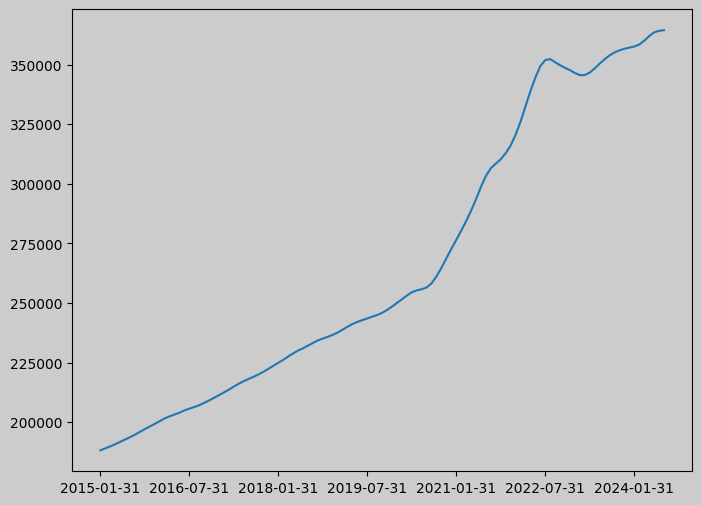

0.9360425798603323


In [14]:
 # plot the relationships 
plt.figure(figsize=(8, 6)) 
plt.plot(home_first_row) 
n = 18  # Set the interval for showing x-tick labels
plt.xticks(range(0, len(home_first_row.index), n), home_first_row.index[::n])

# Change the background color
plt.gca().set_facecolor('#CCCCCC')  # Set the background color of the plot area
plt.gcf().set_facecolor('#CCCCCC')  # Set the background color of the fig

plt.savefig("../IMAGES/home_US.png")
plt.show()
print((364384.810590 - 188211.155261)/188211.155261)

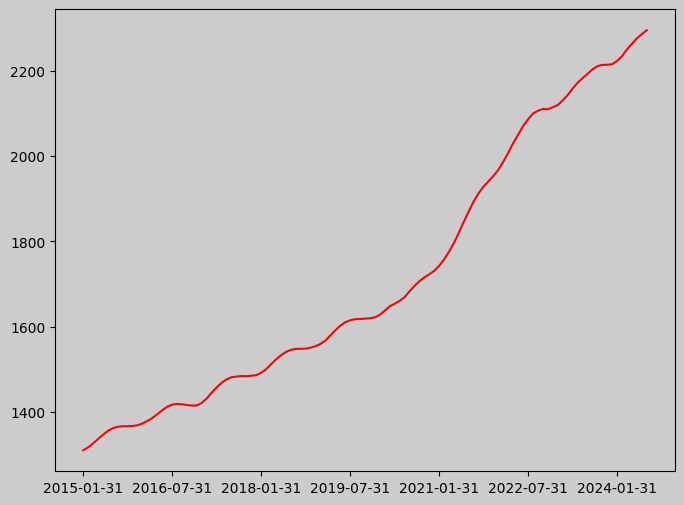

0.7502720131728399


In [15]:
plt.figure(figsize=(8, 6))
plt.plot(rental_first_row, color = 'red')
n = 18  # Set the interval for showing x-tick labels
plt.xticks(range(0, len(rental_first_row.index), n), rental_first_row.index[::n])

# Change the background color
plt.gca().set_facecolor('#CCCCCC')  # Set the background color of the plot area
plt.gcf().set_facecolor('#CCCCCC')  # Set the background color of the fig

plt.savefig("../IMAGES/rental_US.png")
plt.show()
print((2294.365189 - 1310.862067)/ 1310.862067)

In [16]:
filtered_home_df.loc[:, ["RegionName", "RegionType", "StateName"]] = filtered_home_df[["RegionName", "RegionType", "StateName"]].astype(str)

In [17]:
print(filtered_home_df.dtypes)

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-03-31    float64
2024-04-30    float64
2024-05-31    float64
2024-06-30    float64
2024-07-31    float64
Length: 120, dtype: object


In [18]:
percent_change = []
for index, row in filtered_home_df.iterrows():
    change = ((row['2024-07-31'] - row['2015-01-31']) / row['2015-01-31'])*100
    percent_change.append(change)

In [19]:
rental_percent_change = []
for index, row in rental_df.iterrows():
    rental_change = ((row['2024-07-31'] - row['2015-01-31']) / row['2015-01-31'])*100
    rental_percent_change.append(rental_change)

In [20]:
filtered_home_df["housingPercentChange"] = percent_change

In [21]:
filtered_home_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,housingPercentChange
0,102001,0,United States,country,USA,188211.155261,189021.319587,189847.798856,190756.066067,191755.432776,...,356640.365507,357118.576760,357576.035711,358418.372959,360011.602927,361969.362164,363503.321866,364165.906995,364384.810590,93.604258
3,394299,251,"Abilene, TX",msa,TX,116800.595050,117081.811975,117607.011253,118188.855822,118650.044099,...,191428.675549,191104.713083,191168.646556,191895.586212,193224.785314,194664.910874,195355.061992,195459.366448,194900.821983,66.866292
6,394304,83,"Akron, OH",msa,OH,120102.163828,120101.111310,120096.438119,120548.211980,121246.090732,...,213580.435519,214016.228955,214378.717565,215226.845932,216930.776064,219253.225285,221406.478855,222904.047999,223822.771257,86.360315
8,394308,64,"Albany, NY",msa,NY,202239.261415,202746.238898,203199.328919,203607.285462,204017.138617,...,322925.400505,323988.027020,325163.552854,326799.002703,328968.874016,331765.306711,334428.769717,336441.346141,338039.246133,67.148181
12,394312,62,"Albuquerque, NM",msa,NM,173035.342285,173603.094282,174285.048982,175055.558200,175507.486038,...,332237.417182,333351.629180,334461.994196,335570.283667,337338.946222,339196.998140,340541.588924,340771.315083,340734.171076,96.915940


In [22]:
rental_df["rentalPercentChange"] = rental_percent_change
rental_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,rentalPercentChange
0,102001,0,United States,country,USA,1310.862067,1317.635432,1326.592064,1337.166174,1347.094223,...,2213.517002,2214.817776,2222.706032,2233.819378,2249.433872,2262.554936,2275.422072,2285.166408,2294.365189,75.027201
1,394299,251,"Abilene, TX",msa,TX,975.342756,976.731022,972.594031,976.605687,990.087656,...,1477.258948,1460.553702,1464.349388,1465.173211,1489.057823,1521.466343,1535.699422,1541.539681,1534.302611,57.309069
2,394304,83,"Akron, OH",msa,OH,799.963745,799.444330,794.695413,809.017360,810.941579,...,1291.077986,1299.707092,1313.416939,1324.198885,1312.175436,1318.633294,1322.399550,1344.870012,1358.396907,69.807309
3,394308,64,"Albany, NY",msa,NY,1394.809405,1424.351695,1433.907926,1437.900711,1438.200996,...,2196.431549,2196.525040,2286.016091,2258.880520,2287.928469,2236.977051,2297.179644,2312.802631,2326.492685,66.796458
4,394312,62,"Albuquerque, NM",msa,NM,1122.820680,1125.679974,1137.171708,1143.781134,1149.529923,...,2005.984398,2018.085217,2016.503414,2013.389959,2012.501254,2040.708325,2056.063908,2067.411738,2060.090464,83.474574


In [23]:
# Try exporting to JSON
filtered_home_df.to_json('filtered_home_df.json', orient='records', indent=4)

In [24]:
# export rental dataframe to json
rental_df.to_json('rental_df.json', orient='records', indent=4)

## Create heat maps to analyze prices by location

In [25]:
home_heat_df = filtered_home_df[["RegionName", "2024-07-31"]]
home_heat_df.head()

,RegionName,2024-07-31
0,United States,364384.810590
3,"Abilene, TX",194900.821983
6,"Akron, OH",223822.771257
8,"Albany, NY",338039.246133
12,"Albuquerque, NM",340734.171076


In [26]:
rental_heat_df = rental_df[["RegionName", "2024-07-31"]]
rental_heat_df.head()

,RegionName,2024-07-31
0,United States,2294.365189
1,"Abilene, TX",1534.302611
2,"Akron, OH",1358.396907
3,"Albany, NY",2326.492685
4,"Albuquerque, NM",2060.090464


## bring in the cities dataset for latitude, longitude, and additional data

In [27]:
cities_df = pd.read_csv('../Source/uscities.csv')

In [28]:
cities_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11080.3,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3184.7,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4614.5,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4758.9,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1384.0,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


In [29]:
new_row = pd.DataFrame({'city': ['Urban Honolulu'], 'state_id': ['HI'], 'state_name': ['Hawaii'], 'lat': [21.315603], 'lng': [-157.858093], 'population': [341778]})
new_row_2 = pd.DataFrame({'city': ['Boise City'], 'state_id': ['ID'], 'state_name': ['Idaho'], 'lat': [43.618881], 'lng': [-116.215019], 'population': [236634]})
cities_df = pd.concat([cities_df, new_row, new_row_2], ignore_index=True)

In [30]:
cities_df_simple = cities_df[["city", "state_id", "lat", "lng"]]
cities_df_simple.head()

,city,state_id,lat,lng
0,New York,NY,40.6943,-73.9249
1,Los Angeles,CA,34.1141,-118.4068
2,Chicago,IL,41.8375,-87.6866
3,Miami,FL,25.7840,-80.2101
4,Houston,TX,29.7860,-95.3885


In [31]:
cities_df_simple.loc[cities_df_simple['state_id'] == 'ID']

,city,state_id,lat,lng
96,Boise,ID,43.600500,-116.230800
233,Nampa,ID,43.584400,-116.563800
336,Coeur d'Alene,ID,47.704000,-116.793600
374,Meridian,ID,43.611600,-116.397700
422,Idaho Falls,ID,43.487100,-112.036200
...,...,...,...,...
30540,Coolin,ID,48.476000,-116.844100
30625,Banks,ID,44.077700,-116.127800
30646,Drummond,ID,43.999600,-111.343300
30892,Warm River,ID,44.118800,-111.320000


In [32]:
cities_df_simple['RegionName'] = cities_df_simple['city'].astype(str) + ', ' + cities_df_simple['state_id'].astype(str)

/var/folders/tn/g6qz3f296z7cn5d90mgpvj600000gn/T/ipykernel_44643/2841874249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_df_simple['RegionName'] = cities_df_simple['city'].astype(str) + ', ' + cities_df_simple['state_id'].astype(str)


In [33]:
cities_df_simple.loc[cities_df_simple['RegionName'] == 'Urban Honolulu, HI']

,city,state_id,lat,lng,RegionName
31120,Urban Honolulu,HI,21.315603,-157.858093,"Urban Honolulu, HI"


In [34]:
# add latitude and longitude to rental_heat_df
rental_heat_df = pd.merge(rental_heat_df, cities_df_simple, on = 'RegionName', how = 'inner')
rental_heat_df.head()

,RegionName,2024-07-31,city,state_id,lat,lng
0,"Abilene, TX",1534.302611,Abilene,TX,32.4543,-99.7384
1,"Akron, OH",1358.396907,Akron,OH,41.0798,-81.5219
2,"Albany, NY",2326.492685,Albany,NY,42.6664,-73.7987
3,"Albuquerque, NM",2060.090464,Albuquerque,NM,35.1054,-106.6465
4,"Allentown, PA",2130.268164,Allentown,PA,40.5961,-75.4756


In [35]:
# remove extra columns
rental_heat_df = rental_heat_df[['RegionName', 'lat', 'lng', '2024-07-31']]
rental_heat_df.rename(columns={'2024-07-31': 'price'}, inplace=True)
rental_heat_df.head()

,RegionName,lat,lng,price
0,"Abilene, TX",32.4543,-99.7384,1534.302611
1,"Akron, OH",41.0798,-81.5219,1358.396907
2,"Albany, NY",42.6664,-73.7987,2326.492685
3,"Albuquerque, NM",35.1054,-106.6465,2060.090464
4,"Allentown, PA",40.5961,-75.4756,2130.268164


In [36]:
# add latitude and longitude to home_heat_df
home_heat_df = pd.merge(home_heat_df, cities_df_simple, on = 'RegionName', how = 'inner')
home_heat_df.head()

,RegionName,2024-07-31,city,state_id,lat,lng
0,"Abilene, TX",194900.821983,Abilene,TX,32.4543,-99.7384
1,"Akron, OH",223822.771257,Akron,OH,41.0798,-81.5219
2,"Albany, NY",338039.246133,Albany,NY,42.6664,-73.7987
3,"Albuquerque, NM",340734.171076,Albuquerque,NM,35.1054,-106.6465
4,"Allentown, PA",337281.004379,Allentown,PA,40.5961,-75.4756


In [37]:
# remove unnecessary columns
home_heat_df = home_heat_df[['RegionName', 'lat', 'lng', '2024-07-31']]
home_heat_df.rename(columns={'2024-07-31': 'price'}, inplace=True)
home_heat_df.head()

,RegionName,lat,lng,price
0,"Abilene, TX",32.4543,-99.7384,194900.821983
1,"Akron, OH",41.0798,-81.5219,223822.771257
2,"Albany, NY",42.6664,-73.7987,338039.246133
3,"Albuquerque, NM",35.1054,-106.6465,340734.171076
4,"Allentown, PA",40.5961,-75.4756,337281.004379


In [38]:
home_heat_df.to_json('home_heat_df.json', orient='records', indent=4)

In [39]:
rental_heat_df.to_json('rental_heat_df.json', orient='records', indent=4)

In [40]:
rental_heat_df.dtypes

RegionName     object
lat           float64
lng           float64
price         float64
dtype: object

In [41]:
home_heat_df["price"].mean()

397217.4305108359

In [42]:
rental_heat_df["price"].mean()

2188.6521546462054

In [43]:
difference = filtered_home_df["housingPercentChange"].values - rental_df["rentalPercentChange"].values
print(difference)

[ 18.57705668   9.55722268  16.55300658   0.35172265  13.44136567
  10.54306305   1.8106634   15.26302866   9.49216929  30.36359001
 -47.36769226  14.53679826  30.34838541  19.54948423   5.22790363
   3.23104333 -15.42249354  17.35785759  47.39282504  20.68993579
  31.24861844  21.51658576 -22.05358995  17.97203866   7.53700605
 -15.75612102  10.72449138  44.09629314 -10.60095143  15.23383126
   8.86174611  12.92048852  14.68911103  19.72281907  21.5958674
  21.06154056  18.79454584   7.48776658  14.92391256   5.29314154
  30.57564117  16.947904     7.58099951  44.50178061  -2.46223685
  35.49417009  30.56076071  32.10212943  35.44846225  19.17085428
  17.95255143  43.0585436    3.86160565  32.88245793  12.37990858
  24.41003543  18.91185191  19.43319844  13.27501784  18.27735178
   6.16932165  23.07951919   9.70330539   8.74564998   6.27096356
   0.94259963   5.33460875  32.01338722  -4.13030965  32.98539096
  36.34818234  23.11767758  32.31838626  26.9829413   29.07271337
  24.867958

In [44]:
filtered_home_df["discrepancy"] = difference
filtered_home_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,housingPercentChange,discrepancy
0,102001,0,United States,country,USA,188211.155261,189021.319587,189847.798856,190756.066067,191755.432776,...,357118.576760,357576.035711,358418.372959,360011.602927,361969.362164,363503.321866,364165.906995,364384.810590,93.604258,18.577057
3,394299,251,"Abilene, TX",msa,TX,116800.595050,117081.811975,117607.011253,118188.855822,118650.044099,...,191104.713083,191168.646556,191895.586212,193224.785314,194664.910874,195355.061992,195459.366448,194900.821983,66.866292,9.557223
6,394304,83,"Akron, OH",msa,OH,120102.163828,120101.111310,120096.438119,120548.211980,121246.090732,...,214016.228955,214378.717565,215226.845932,216930.776064,219253.225285,221406.478855,222904.047999,223822.771257,86.360315,16.553007
8,394308,64,"Albany, NY",msa,NY,202239.261415,202746.238898,203199.328919,203607.285462,204017.138617,...,323988.027020,325163.552854,326799.002703,328968.874016,331765.306711,334428.769717,336441.346141,338039.246133,67.148181,0.351723
12,394312,62,"Albuquerque, NM",msa,NM,173035.342285,173603.094282,174285.048982,175055.558200,175507.486038,...,333351.629180,334461.994196,335570.283667,337338.946222,339196.998140,340541.588924,340771.315083,340734.171076,96.915940,13.441366


In [45]:
# make a dataframe with just cities and percent differences
discrepancy_df = filtered_home_df[['RegionName', 'discrepancy']]
discrepancy_df.head()

,RegionName,discrepancy
0,United States,18.577057
3,"Abilene, TX",9.557223
6,"Akron, OH",16.553007
8,"Albany, NY",0.351723
12,"Albuquerque, NM",13.441366


In [46]:
# all cities with differences between rental prices and home values
discrepancy_df.sort_values(by = 'discrepancy', ascending = True)
discrepancy_df.loc[discrepancy_df['discrepancy'] < 0].count() # 19 cities had higher rent increase
discrepancy_df.loc[discrepancy_df['discrepancy'] > 0] # 145 cities had higher home value increase

,RegionName,discrepancy
0,United States,18.577057
3,"Abilene, TX",9.557223
6,"Akron, OH",16.553007
8,"Albany, NY",0.351723
12,"Albuquerque, NM",13.441366
...,...,...
808,"Washington, DC",5.763992
823,"Wichita, KS",37.297889
827,"Wilmington, NC",11.099102
832,"Winston, NC",16.710155


In [123]:
# top 10 -- rent increased more than housing price
discrepancy_df.sort_values(by = 'discrepancy', ascending = True).head(10)

,RegionName,discrepancy
43,"Atlantic City, NJ",-47.367692
107,"Bridgeport, CT",-22.053590
544,"New Orleans, LA",-21.828720
426,"Lawton, OK",-21.814231
711,"Shreveport, LA",-17.220950
536,"Naples, FL",-16.538234
138,"Champaign, IL",-15.756121
67,"Beaumont, TX",-15.422494
694,"Sebastian, FL",-11.199983
143,"Charlottesville, VA",-10.600951


In [124]:
# top 10 -- housing price increased more than rent
discrepancy_df.sort_values(by = 'discrepancy', ascending = True).tail(10)

,RegionName,discrepancy
674,"Salt Lake City, UT",41.812677
258,"Fayetteville, AR",43.058544
757,"Tampa, FL",43.205490
622,"Port St. Lucie, FL",44.017234
142,"Charlotte, NC",44.096293
190,"Dallas, TX",44.501781
693,"Seattle, WA",46.884857
94,"Boise City, ID",47.392825
413,"Lakeland, FL",53.513108
537,"Nashville, TN",53.592115


In [47]:
# dataframe for % change in home values
home_percents = filtered_home_df[["RegionName", "housingPercentChange"]]
home_percents = pd.merge(home_percents, cities_df_simple, on = 'RegionName', how = 'inner')
home_percents = home_percents[["RegionName", "lat", "lng", "housingPercentChange"]]
home_percents.rename(columns={'housingPercentChange': 'price'}, inplace=True)
# show top 5
home_top_5 = home_percents.sort_values(by = 'price', ascending = False).head()
home_top_5 = home_top_5[["RegionName", "price"]]
home_top_5 = home_top_5.set_index("RegionName", drop=True)
home_top_5

,price
RegionName,
"Port St. Lucie, FL",157.291860
"Boise City, ID",156.526830
"Tampa, FL",142.769287
"Palm Bay, FL",142.273392
"Spokane, WA",140.904842


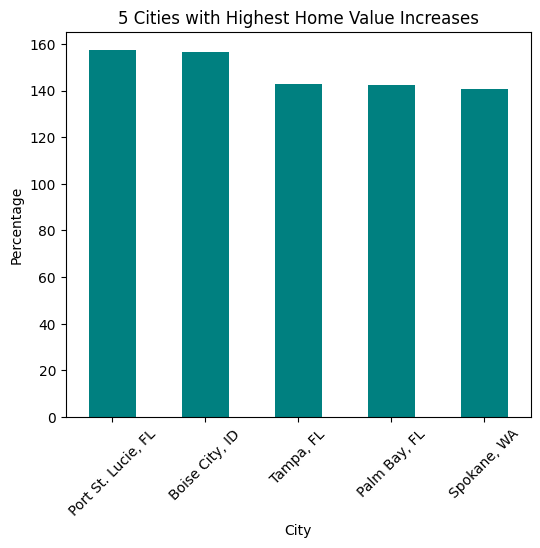

<Figure size 640x480 with 0 Axes>

In [48]:
# bar plot for cities with highest home value increases
home_top_5.plot(kind = "bar", color = 'teal', figsize = (6, 5), xlabel = "City", ylabel = "Percentage", title = "5 Cities with Highest Home Value Increases", legend = False)
plt.xticks(rotation=45)

# Save the figure
plt.savefig("../IMAGES/home_top_5.png")

plt.show()
plt.tight_layout()

In [49]:
# dataframe for % change in rental prices
rental_percents = rental_df[["RegionName", "rentalPercentChange"]]
rental_percents = pd.merge(rental_percents, cities_df_simple, on = 'RegionName', how = 'inner')
rental_percents = rental_percents[["RegionName", "lat", "lng", "rentalPercentChange"]]
rental_percents.rename(columns={'rentalPercentChange': 'price'}, inplace=True)
# show top 5
rental_top_5 = rental_percents.sort_values(by = 'price', ascending = False).head()
rental_top_5 = rental_top_5[["RegionName", "price"]]
rental_top_5 = rental_top_5.set_index("RegionName", drop=True)

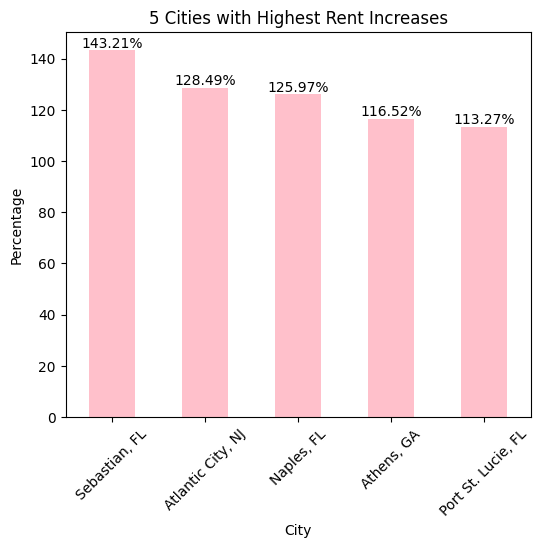

<Figure size 640x480 with 0 Axes>

In [50]:
# Bar plot for cities with highest rent increases
ax = rental_top_5.plot(kind="bar", color='pink', figsize=(6, 5), xlabel="City", ylabel="Percentage", title="5 Cities with Highest Rent Increases", legend=False)
plt.xticks(rotation=45)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Save the figure
plt.savefig("../IMAGES/rental_top_5.png")

plt.show()
plt.tight_layout()

In [51]:
# show bottom 5 home price changes
home_bottom_5 = home_percents.sort_values(by = 'price', ascending = False).tail()
home_bottom_5 = home_bottom_5[["RegionName", "price"]]
home_bottom_5 = home_bottom_5.set_index("RegionName", drop=True)
home_bottom_5

,price
RegionName,
"Davenport, IA",40.499311
"Baton Rouge, LA",38.194246
"Lawton, OK",30.750566
"New Orleans, LA",22.894946
"Shreveport, LA",15.520892


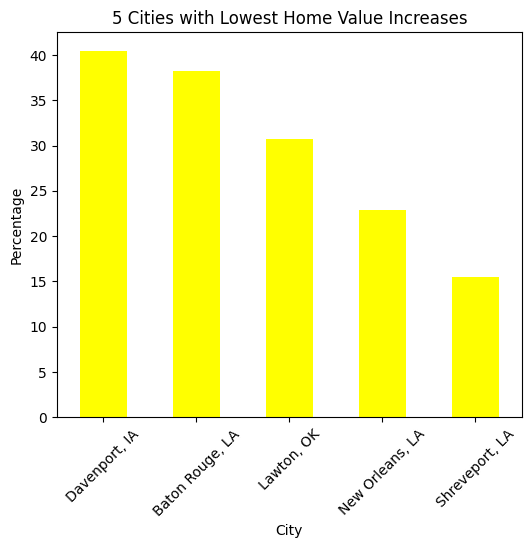

<Figure size 640x480 with 0 Axes>

In [52]:
# bar plot for cities with lowest home value increases
home_bottom_5.plot(kind = "bar", color = 'yellow', figsize = (6, 5), xlabel = "City", ylabel = "Percentage", title = "5 Cities with Lowest Home Value Increases", legend = False)
plt.xticks(rotation=45)

# Save the figure
plt.savefig("../IMAGES/home_bottom_5.png")

plt.show()
plt.tight_layout()

In [53]:
# show bottom 5 rental price changes
rental_bottom_5 = rental_percents.sort_values(by = 'price', ascending = False).tail()
rental_bottom_5 = rental_bottom_5[["RegionName", "price"]]
rental_bottom_5 = rental_bottom_5.set_index("RegionName", drop=True)
rental_bottom_5

,price
RegionName,
"Lubbock, TX",41.985131
"Corpus Christi, TX",36.818134
"Baton Rouge, LA",34.963203
"Shreveport, LA",32.741843
"Manhattan, KS",26.257824


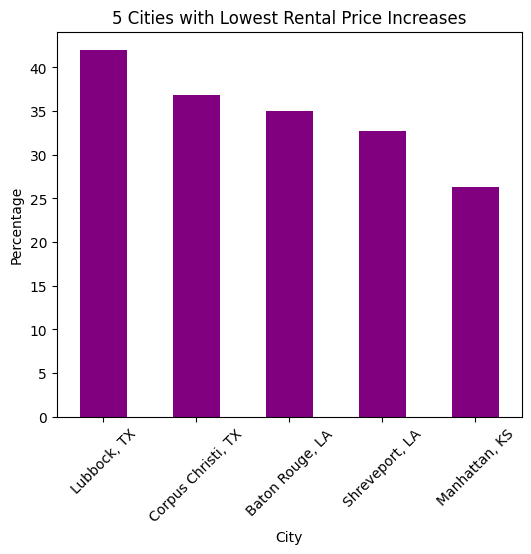

<Figure size 640x480 with 0 Axes>

In [54]:
# bar plot for cities with lowest rental price increases
rental_bottom_5.plot(kind = "bar", color = 'purple', figsize = (6, 5), xlabel = "City", ylabel = "Percentage", title = "5 Cities with Lowest Rental Price Increases", legend = False)
plt.xticks(rotation=45)

# Save the figure
plt.savefig("../IMAGES/rental_bottom_5.png")

plt.show()
plt.tight_layout()

In [55]:
# save them to json for additional maps
home_percents.to_json('home_percents.json', orient='records', indent=4)
rental_percents.to_json('rental_percents.json', orient='records', indent=4)

In [56]:
housing_percentages = home_percents
rental_percentages = rental_percents
housing_percentages.rename(columns={'price' : 'housingPercentChange'}, inplace=True)
rental_percentages.rename(columns={'price' : 'rentalPercentChange'}, inplace=True)
merged_df = pd.merge(housing_percentages, rental_percentages, on = 'RegionName')
merged_df.head()

,RegionName,lat_x,lng_x,housingPercentChange,lat_y,lng_y,rentalPercentChange
0,"Abilene, TX",32.4543,-99.7384,66.866292,32.4543,-99.7384,57.309069
1,"Akron, OH",41.0798,-81.5219,86.360315,41.0798,-81.5219,69.807309
2,"Albany, NY",42.6664,-73.7987,67.148181,42.6664,-73.7987,66.796458
3,"Albuquerque, NM",35.1054,-106.6465,96.915940,35.1054,-106.6465,83.474574
4,"Allentown, PA",40.5961,-75.4756,80.816776,40.5961,-75.4756,70.273713


The correlation between both factors is 0.79


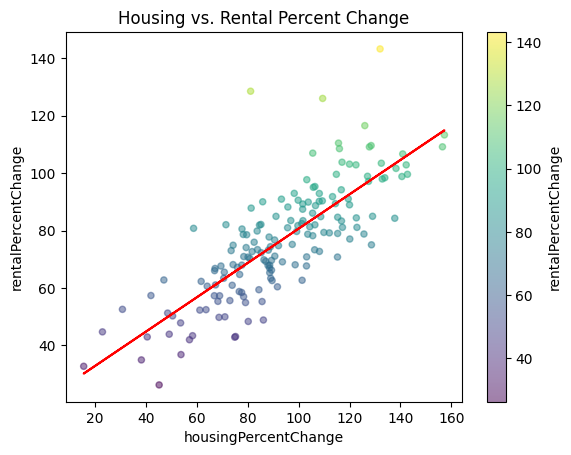

In [57]:
merged_df.plot(kind="scatter", x= 'housingPercentChange' , 
          y='rentalPercentChange',
          c='rentalPercentChange',
          cmap='viridis', alpha=0.5,
          xlabel='housingPercentChange',          
          ylabel='rentalPercentChange',
          title='Housing vs. Rental Percent Change',)
x_values = merged_df["housingPercentChange"] 
y_values = merged_df["rentalPercentChange"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(st.pearsonr(x_values,y_values)[0],2)}")

plt.savefig("../IMAGES/rental_vs_housing_corr.png")

In [58]:
cities_df['RegionName'] = cities_df['city'].astype(str) + ', ' + cities_df['state_id'].astype(str)

In [59]:
home_merged = pd.merge(filtered_home_df, cities_df, on = 'RegionName', how = 'inner')

In [60]:
home_merged.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,394299,251,"Abilene, TX",msa,TX,116800.595050,117081.811975,117607.011253,118188.855822,118650.044099,...,-99.7384,126356,457.4,shape,False,True,America/Chicago,2.0,79607 79605 79699 79603 79602 79601 79606 7960...,1.840019e+09
1,394304,83,"Akron, OH",msa,OH,120102.163828,120101.111310,120096.438119,120548.211980,121246.090732,...,-81.5219,541945,1186.2,shape,False,True,America/New_York,2.0,44306 44307 44304 44305 44302 44303 44301 4430...,1.840001e+09
2,394308,64,"Albany, NY",msa,NY,202239.261415,202746.238898,203199.328919,203607.285462,204017.138617,...,-73.7987,590694,1798.3,shape,False,True,America/New_York,2.0,12208 12209 12204 12206 12207 12202 12203 1220...,1.840000e+09
3,394312,62,"Albuquerque, NM",msa,NM,173035.342285,173603.094282,174285.048982,175055.558200,175507.486038,...,-106.6465,769986,1159.8,shape,False,True,America/Denver,2.0,87123 87112 87113 87110 87111 87114 87109 8710...,1.840019e+09
4,394318,70,"Allentown, PA",msa,PA,186531.920105,186243.717132,186196.175526,186256.927504,186609.449982,...,-75.4756,627863,2754.2,shape,False,True,America/New_York,2.0,18104 18101 18103 18102 18109 18001 18105,1.840001e+09


In [61]:
home_merged = home_merged[['RegionName', 'StateName', '2024-07-31', 'housingPercentChange', 'population']]
home_merged.head()

,RegionName,StateName,2024-07-31,housingPercentChange,population
0,"Abilene, TX",TX,194900.821983,66.866292,126356
1,"Akron, OH",OH,223822.771257,86.360315,541945
2,"Albany, NY",NY,338039.246133,67.148181,590694
3,"Albuquerque, NM",NM,340734.171076,96.915940,769986
4,"Allentown, PA",PA,337281.004379,80.816776,627863


In [62]:
home_merged_sorted = home_merged.sort_values(by='population', ascending = False)
home_merged_sorted.head()

,RegionName,StateName,2024-07-31,housingPercentChange,population
103,"New York, NY",NY,6.932481e+05,70.554704,18908608
83,"Los Angeles, CA",CA,1.010107e+06,87.053409,11922389
30,"Chicago, IL",IL,3.429366e+05,68.267833,8497759
92,"Miami, FL",FL,5.784635e+05,132.861467,6080145
66,"Houston, TX",TX,3.156460e+05,74.881689,5970127


In [63]:
# drop NY and LA
home_merged = home_merged.drop(102)

In [64]:
home_merged = home_merged.drop(82)

In [65]:
rental_merged = pd.merge(rental_df, cities_df, on = 'RegionName', how = 'inner')

In [66]:
rental_merged = rental_merged[['RegionName', 'StateName', '2024-07-31', 'rentalPercentChange', 'population']]
rental_merged.head()

,RegionName,StateName,2024-07-31,rentalPercentChange,population
0,"Abilene, TX",TX,1534.302611,57.309069,126356
1,"Akron, OH",OH,1358.396907,69.807309,541945
2,"Albany, NY",NY,2326.492685,66.796458,590694
3,"Albuquerque, NM",NM,2060.090464,83.474574,769986
4,"Allentown, PA",PA,2130.268164,70.273713,627863


## markdown graphs

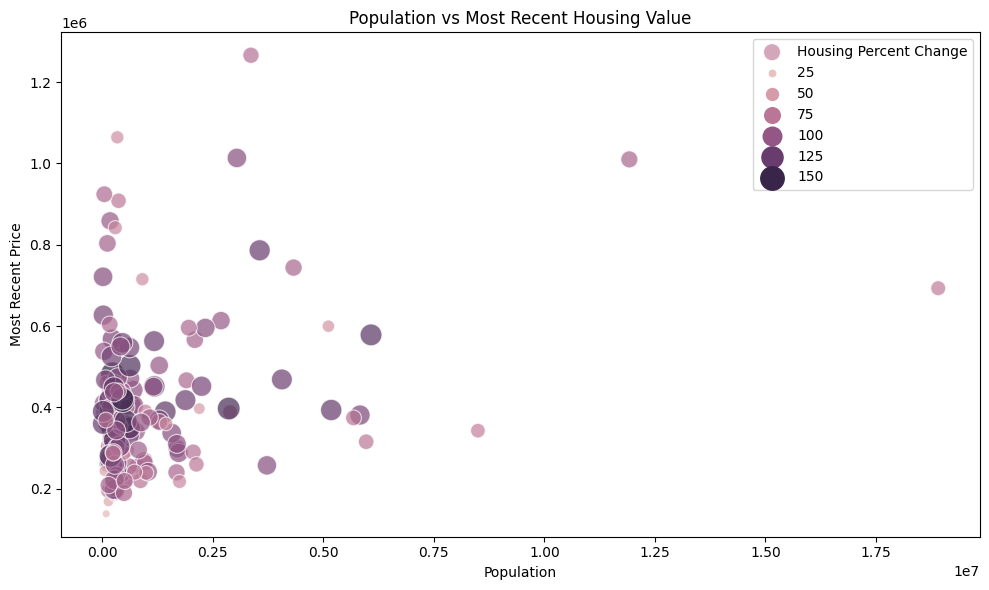

In [67]:
# Create the bubble chart using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='population', 
    y='2024-07-31', 
    size='housingPercentChange',  # Bubble size represents percentage
    sizes=(1, 300),  # Scale bubble size
    hue='housingPercentChange',  # Optional: Color each bubble based on city
    data= home_merged,
    alpha=0.7,  # Set transparency for better visualization
    label = "Housing Percent Change"
)

plt.title('Population vs Most Recent Housing Value')
plt.xlabel('Population')
plt.ylabel('Most Recent Price')
plt.legend()

plt.tight_layout()
plt.savefig("../IMAGES/homes_bubble_chart.png")
plt.show()

In [68]:
rental_merged = rental_merged.drop(102)

In [69]:
rental_merged = rental_merged.drop(82)

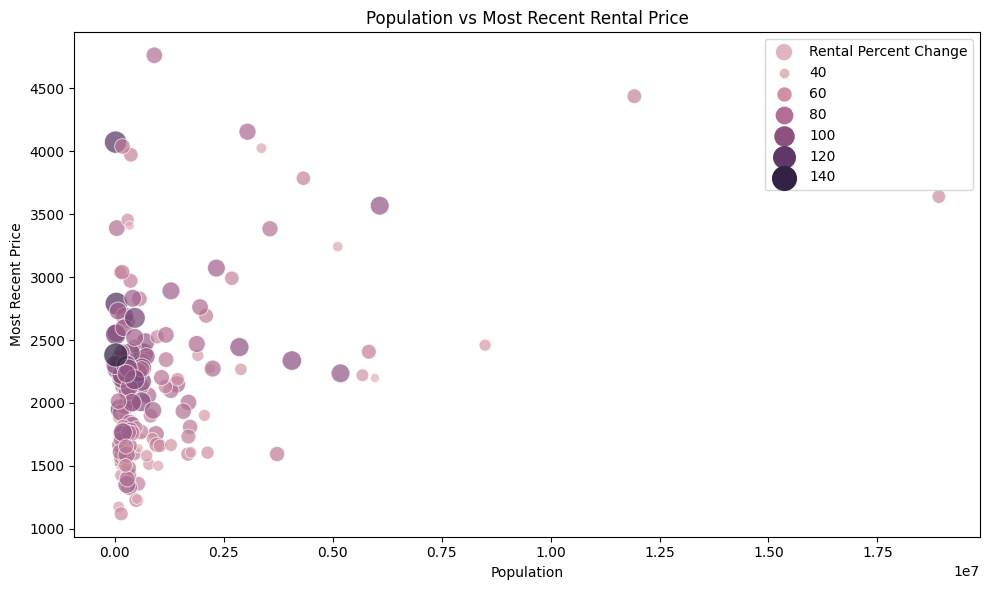

In [70]:
# rental percent change bubble chart
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='population', 
    y='2024-07-31', 
    size='rentalPercentChange',  # Bubble size represents percentage
    sizes=(1, 300),  # Scale bubble size
    hue = 'rentalPercentChange',  # Optional: Color each bubble based on city
    data= rental_merged,
    alpha=0.7,  # Set transparency for better visualization
    label = "Rental Percent Change"
)

plt.title('Population vs Most Recent Rental Price')
plt.xlabel('Population')
plt.ylabel('Most Recent Price')
plt.legend()

plt.tight_layout()
plt.savefig("../IMAGES/rental_bubble_chart.png")
plt.show()

## Export to CSV for Database Storage

In [71]:
filtered_home_df[["RegionName", "RegionType", "StateName"]] = filtered_home_df[["RegionName", "RegionType", "StateName"]].astype('string')

In [72]:
filtered_home_df.dtypes

RegionID                         int64
SizeRank                         int64
RegionName              string[python]
RegionType              string[python]
StateName               string[python]
                             ...      
2024-05-31                     float64
2024-06-30                     float64
2024-07-31                     float64
housingPercentChange           float64
discrepancy                    float64
Length: 122, dtype: object

In [73]:
filtered_home_df.to_csv('../SOURCE/filtered_home_df.csv', index = False)

In [74]:
rental_df.loc[rental_df['StateName'] == 'HI']

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,rentalPercentChange
161,753924,55,"Urban Honolulu, HI",msa,HI,2378.042482,2397.231081,2385.199463,2364.93382,2384.455369,...,3343.720749,3334.425818,3311.75527,3290.479658,3312.458587,3340.235627,3370.690334,3395.353091,3409.848202,43.388868


In [75]:
rental_df[["RegionName", "RegionType", "StateName"]] = rental_df[["RegionName", "RegionType", "StateName"]].astype('string')

In [76]:
rental_df.dtypes

RegionID                        int64
SizeRank                        int64
RegionName             string[python]
RegionType             string[python]
StateName              string[python]
                            ...      
2024-04-30                    float64
2024-05-31                    float64
2024-06-30                    float64
2024-07-31                    float64
rentalPercentChange           float64
Length: 121, dtype: object

In [77]:
rental_df.to_csv('../SOURCE/rental_df.csv', index = False)

In [78]:
cities_df_simple[["population", "state_name"]] = cities_df[["population", "state_name"]]

/var/folders/tn/g6qz3f296z7cn5d90mgpvj600000gn/T/ipykernel_44643/645740539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_df_simple[["population", "state_name"]] = cities_df[["population", "state_name"]]
/var/folders/tn/g6qz3f296z7cn5d90mgpvj600000gn/T/ipykernel_44643/645740539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_df_simple[["population", "state_name"]] = cities_df[["population", "state_name"]]


In [79]:
cities_df_simple.head()

,city,state_id,lat,lng,RegionName,population,state_name
0,New York,NY,40.6943,-73.9249,"New York, NY",18908608,New York
1,Los Angeles,CA,34.1141,-118.4068,"Los Angeles, CA",11922389,California
2,Chicago,IL,41.8375,-87.6866,"Chicago, IL",8497759,Illinois
3,Miami,FL,25.7840,-80.2101,"Miami, FL",6080145,Florida
4,Houston,TX,29.7860,-95.3885,"Houston, TX",5970127,Texas


In [80]:
# read in GDP dataset for cleaning
gdp_df = pd.read_csv('../SOURCE/cleaned_gdp.csv')
gdp_df.head()

,GeoName,2023
0,United States,22376906.0
1,Alabama,241753.1
2,Alaska,53006.3
3,Arizona,414273.3
4,Arkansas,140784.7


In [81]:
gdp_df.rename(columns = {'GeoName' : 'state_name', '2023' : '2023_GDP'}, inplace=True)
gdp_df.head()

,state_name,2023_GDP
0,United States,22376906.0
1,Alabama,241753.1
2,Alaska,53006.3
3,Arizona,414273.3
4,Arkansas,140784.7


In [82]:
gdp_df.to_csv('../SOURCE/gdp_df.csv', index = False)

In [83]:
filtered_home_df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
       ...
       '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
       '2024-05-31', '2024-06-30', '2024-07-31', 'housingPercentChange',
       'discrepancy'],
      dtype='object', length=122)

In [84]:
cities_df_simple = cities_df_simple[cities_df_simple['RegionName'].isin(filtered_home_df['RegionName'])]

In [85]:
cities_df_simple.groupby('state_id')['population'].mean()

state_id
AL    4.259015e+05
AR    4.270295e+05
AZ    2.471298e+06
CA    1.727390e+06
CO    8.955395e+05
CT    6.538480e+05
DC    5.116378e+06
FL    8.610261e+05
GA    1.086085e+06
HI    3.417780e+05
IA    4.151295e+05
ID    2.366340e+05
IL    2.973725e+06
IN    6.264040e+05
KS    2.371583e+05
KY    6.425440e+05
LA    6.173220e+05
MA    4.328315e+06
MD    1.195892e+06
MI    1.033463e+06
MN    2.892569e+06
MO    1.062338e+06
MS    2.280220e+05
NC    5.652489e+05
NE    8.213450e+05
NJ    2.003330e+05
NM    4.554505e+05
NV    1.352874e+06
NY    6.814630e+06
OH    1.196148e+06
OK    6.071907e+05
OR    7.005442e+05
PA    1.534745e+06
RI    1.290271e+06
SC    4.164562e+05
TN    6.897768e+05
TX    1.635929e+06
UT    8.053383e+05
VA    5.671330e+05
WA    8.959512e+05
WI    8.712960e+05
WY    7.820400e+04
Name: population, dtype: float64

In [86]:
cities_df_simple.dtypes

city           object
state_id       object
lat           float64
lng           float64
RegionName     object
population      int64
state_name     object
dtype: object

In [87]:
cities_df_simple[["city", "state_id", "RegionName", 'state_name']] = cities_df_simple[["city", "state_id", "RegionName", 'state_name']].astype('string')

In [88]:
cities_df_simple.dtypes

city          string[python]
state_id      string[python]
lat                  float64
lng                  float64
RegionName    string[python]
population             int64
state_name    string[python]
dtype: object

In [89]:
cities_df_simple.to_csv('../SOURCE/cities_df_simple.csv', index = False)

In [90]:
just_US = filtered_home_df.head(1)
just_US

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,housingPercentChange,discrepancy
0,102001,0,United States,country,USA,188211.155261,189021.319587,189847.798856,190756.066067,191755.432776,...,357118.57676,357576.035711,358418.372959,360011.602927,361969.362164,363503.321866,364165.906995,364384.81059,93.604258,18.577057


In [91]:
just_US = just_US.drop(columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'housingPercentChange', 'discrepancy'])

In [92]:
just_US_swapped = just_US.transpose()
just_US_swapped = just_US_swapped.reset_index()
just_US_swapped.rename(columns = {'index': 'YEAR', 0: 'PRICE'}, inplace = True)
just_US_swapped

,YEAR,PRICE
0,2015-01-31,188211.155261
1,2015-02-28,189021.319587
2,2015-03-31,189847.798856
3,2015-04-30,190756.066067
4,2015-05-31,191755.432776
...,...,...
110,2024-03-31,360011.602927
111,2024-04-30,361969.362164
112,2024-05-31,363503.321866
113,2024-06-30,364165.906995


In [93]:
state_migration = pd.read_csv('../SOURCE/state_migration.csv')
state_migration = state_migration.dropna(how = 'all')
state_migration.head()

,Unnamed: 0,Unnamed: 1,State,Out (18-19),In (18-19),Out (19-20),In (19-20),Out (20-21),In (20-21),Out (21-22),In (21-22)
0,0.0,US,Total [6],"6,291,178","6,314,737","6,936,136","6,955,187","7,020,935","7,037,026","6,935,681","6,951,666"
1,1.0,AL,Alabama,"84,579","93,331","89,017","106,352","86,001","107,903","84,538","106,884"
2,2.0,AK,Alaska,"33,692","26,195","35,170","28,321","32,852","28,654","32,210","27,334"
3,4.0,AZ,Arizona,"152,769","218,736","167,494","247,311","183,111","239,925","186,286","223,000"
4,5.0,AR,Arkansas,"57,380","59,600","60,038","69,622","56,869","72,828","56,989","71,470"


In [94]:
state_migration = state_migration.replace(',', '', regex=True)

In [95]:
state_migration[['Out (18-19)', 'In (18-19)', 'Out (19-20)', 
                  'In (19-20)', 'Out (20-21)', 'In (20-21)', 
                 'Out (21-22)', 'In (21-22)']] = state_migration[['Out (18-19)', 
                    'In (18-19)', 'Out (19-20)', 
                  'In (19-20)', 'Out (20-21)', 'In (20-21)', 
                 'Out (21-22)', 'In (21-22)']].astype('float')

In [96]:
state_migration.loc[:, state_migration.columns.str.contains('Out')] *= -1

In [97]:
state_migration.head()

,Unnamed: 0,Unnamed: 1,State,Out (18-19),In (18-19),Out (19-20),In (19-20),Out (20-21),In (20-21),Out (21-22),In (21-22)
0,0.0,US,Total [6],-6291178.0,6314737.0,-6936136.0,6955187.0,-7020935.0,7037026.0,-6935681.0,6951666.0
1,1.0,AL,Alabama,-84579.0,93331.0,-89017.0,106352.0,-86001.0,107903.0,-84538.0,106884.0
2,2.0,AK,Alaska,-33692.0,26195.0,-35170.0,28321.0,-32852.0,28654.0,-32210.0,27334.0
3,4.0,AZ,Arizona,-152769.0,218736.0,-167494.0,247311.0,-183111.0,239925.0,-186286.0,223000.0
4,5.0,AR,Arkansas,-57380.0,59600.0,-60038.0,69622.0,-56869.0,72828.0,-56989.0,71470.0


In [98]:
total = []
for row, index in state_migration.iterrows():
    sum = state_migration.iloc[row, 3:].sum()
    total.append(sum)
total

[74686.0,
 70335.0,
 -23420.0,
 239312.0,
 42244.0,
 -1057577.0,
 24381.0,
 -20691.0,
 36324.0,
 -46313.0,
 797928.0,
 179820.0,
 -36791.0,
 111797.0,
 -374153.0,
 30669.0,
 -16633.0,
 -25175.0,
 19221.0,
 -93584.0,
 37859.0,
 -85412.0,
 -152585.0,
 -38451.0,
 -45049.0,
 -15298.0,
 29480.0,
 42733.0,
 -14560.0,
 92709.0,
 30699.0,
 -111825.0,
 -2621.0,
 -884457.0,
 278377.0,
 -16553.0,
 -33111.0,
 60888.0,
 10050.0,
 -53610.0,
 -5574.0,
 230501.0,
 16505.0,
 202912.0,
 611406.0,
 37117.0,
 6178.0,
 -23710.0,
 7528.0,
 -1330.0,
 -178.0,
 6374.0]

In [99]:
state_migration['total'] = total
state_migration

,Unnamed: 0,Unnamed: 1,State,Out (18-19),In (18-19),Out (19-20),In (19-20),Out (20-21),In (20-21),Out (21-22),In (21-22),total
0,0.0,US,Total [6],-6291178.0,6314737.0,-6936136.0,6955187.0,-7020935.0,7037026.0,-6935681.0,6951666.0,74686.0
1,1.0,AL,Alabama,-84579.0,93331.0,-89017.0,106352.0,-86001.0,107903.0,-84538.0,106884.0,70335.0
2,2.0,AK,Alaska,-33692.0,26195.0,-35170.0,28321.0,-32852.0,28654.0,-32210.0,27334.0,-23420.0
3,4.0,AZ,Arizona,-152769.0,218736.0,-167494.0,247311.0,-183111.0,239925.0,-186286.0,223000.0,239312.0
4,5.0,AR,Arkansas,-57380.0,59600.0,-60038.0,69622.0,-56869.0,72828.0,-56989.0,71470.0,42244.0
5,6.0,CA,California,-578664.0,413309.0,-677113.0,418678.0,-724120.0,392876.0,-700947.0,398404.0,-1057577.0
6,8.0,CO,Colorado,-169145.0,188033.0,-192611.0,203886.0,-201874.0,198559.0,-200482.0,198015.0,24381.0
7,9.0,CT,Connecticut,-79769.0,67937.0,-86184.0,83060.0,-86150.0,86605.0,-87574.0,81384.0,-20691.0
8,10.0,DE,Delaware,-26676.0,33006.0,-28024.0,37785.0,-28483.0,39321.0,-28910.0,38305.0,36324.0
9,11.0,DC,District of Columbia,-45106.0,38403.0,-53384.0,38080.0,-52384.0,36211.0,-46861.0,38728.0,-46313.0


In [100]:
state_migration = state_migration.rename(columns = {'Unnamed: 1' : 'State', 'State' : 'StateName'})

In [101]:
state_migration = state_migration[state_migration['State'].isin(home_merged['StateName'])]
state_migration.head()

,Unnamed: 0,State,StateName,Out (18-19),In (18-19),Out (19-20),In (19-20),Out (20-21),In (20-21),Out (21-22),In (21-22),total
1,1.0,AL,Alabama,-84579.0,93331.0,-89017.0,106352.0,-86001.0,107903.0,-84538.0,106884.0,70335.0
3,4.0,AZ,Arizona,-152769.0,218736.0,-167494.0,247311.0,-183111.0,239925.0,-186286.0,223000.0,239312.0
4,5.0,AR,Arkansas,-57380.0,59600.0,-60038.0,69622.0,-56869.0,72828.0,-56989.0,71470.0,42244.0
5,6.0,CA,California,-578664.0,413309.0,-677113.0,418678.0,-724120.0,392876.0,-700947.0,398404.0,-1057577.0
6,8.0,CO,Colorado,-169145.0,188033.0,-192611.0,203886.0,-201874.0,198559.0,-200482.0,198015.0,24381.0


In [102]:
state_migration.head()

,Unnamed: 0,State,StateName,Out (18-19),In (18-19),Out (19-20),In (19-20),Out (20-21),In (20-21),Out (21-22),In (21-22),total
1,1.0,AL,Alabama,-84579.0,93331.0,-89017.0,106352.0,-86001.0,107903.0,-84538.0,106884.0,70335.0
3,4.0,AZ,Arizona,-152769.0,218736.0,-167494.0,247311.0,-183111.0,239925.0,-186286.0,223000.0,239312.0
4,5.0,AR,Arkansas,-57380.0,59600.0,-60038.0,69622.0,-56869.0,72828.0,-56989.0,71470.0,42244.0
5,6.0,CA,California,-578664.0,413309.0,-677113.0,418678.0,-724120.0,392876.0,-700947.0,398404.0,-1057577.0
6,8.0,CO,Colorado,-169145.0,188033.0,-192611.0,203886.0,-201874.0,198559.0,-200482.0,198015.0,24381.0


In [103]:
state_migration_sorted = state_migration.sort_values(by = 'State', ascending = True)
state_migration_sorted

,Unnamed: 0,State,StateName,Out (18-19),In (18-19),Out (19-20),In (19-20),Out (20-21),In (20-21),Out (21-22),In (21-22),total
1,1.0,AL,Alabama,-84579.0,93331.0,-89017.0,106352.0,-86001.0,107903.0,-84538.0,106884.0,70335.0
4,5.0,AR,Arkansas,-57380.0,59600.0,-60038.0,69622.0,-56869.0,72828.0,-56989.0,71470.0,42244.0
3,4.0,AZ,Arizona,-152769.0,218736.0,-167494.0,247311.0,-183111.0,239925.0,-186286.0,223000.0,239312.0
5,6.0,CA,California,-578664.0,413309.0,-677113.0,418678.0,-724120.0,392876.0,-700947.0,398404.0,-1057577.0
6,8.0,CO,Colorado,-169145.0,188033.0,-192611.0,203886.0,-201874.0,198559.0,-200482.0,198015.0,24381.0
7,9.0,CT,Connecticut,-79769.0,67937.0,-86184.0,83060.0,-86150.0,86605.0,-87574.0,81384.0,-20691.0
10,12.0,FL,Florida,-431307.0,558096.0,-459543.0,627077.0,-449260.0,708535.0,-456796.0,701126.0,797928.0
11,13.0,GA,Georgia,-218625.0,254258.0,-237908.0,275400.0,-228240.0,283732.0,-229313.0,280516.0,179820.0
12,15.0,HI,Hawaii,-57263.0,48269.0,-60666.0,51857.0,-60636.0,49831.0,-57107.0,48924.0,-36791.0
16,19.0,IA,Iowa,-58662.0,53281.0,-63124.0,59999.0,-61991.0,58819.0,-61656.0,56701.0,-16633.0


In [104]:
home_merged.head()

,RegionName,StateName,2024-07-31,housingPercentChange,population
0,"Abilene, TX",TX,194900.821983,66.866292,126356
1,"Akron, OH",OH,223822.771257,86.360315,541945
2,"Albany, NY",NY,338039.246133,67.148181,590694
3,"Albuquerque, NM",NM,340734.171076,96.915940,769986
4,"Allentown, PA",PA,337281.004379,80.816776,627863


In [105]:
state_housing_percents = pd.DataFrame(home_merged.groupby("StateName")["housingPercentChange"].mean())

In [106]:
state_housing_percents.sort_values(by = "StateName", ascending = True)

,housingPercentChange
StateName,
AL,72.958290
AR,120.103723
AZ,112.048671
CA,93.572785
CO,99.253650
CT,69.543183
FL,123.814271
GA,107.480226
HI,58.308641


In [107]:
state_rental_percents = pd.DataFrame(rental_merged.groupby("StateName")["rentalPercentChange"].mean())

In [108]:
state_rental_percents.sort_values(by = "rentalPercentChange", ascending = False)

,rentalPercentChange
StateName,
ID,109.134005
NJ,99.623032
FL,97.833749
WA,95.325961
AZ,95.133345
GA,93.462949
RI,90.547243
OR,89.166517
UT,87.939898


In [109]:
x_values = state_migration_sorted["total"] 
y_values = state_housing_percents["housingPercentChange"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(st.pearsonr(x_values,y_values)[0],2)}")

The correlation between both factors is 0.27


In [110]:
## highest prices
top_10_price = filtered_home_df.sort_values(by = '2024-07-31', ascending = False).head(10)
top_10_price

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,housingPercentChange,discrepancy
678,395057,12,"San Francisco, CA",msa,CA,702662.186551,712283.128911,721800.935577,730717.787663,739733.040556,...,1.226036e+06,1.221023e+06,1.218415e+06,1.224755e+06,1.239017e+06,1.254518e+06,1.262955e+06,1.266172e+06,80.196441,31.842648
783,753924,55,"Urban Honolulu, HI",msa,HI,672345.033218,675076.497388,677435.269371,678105.607547,679331.002674,...,1.047974e+06,1.047806e+06,1.047066e+06,1.050272e+06,1.058412e+06,1.065479e+06,1.066688e+06,1.064380e+06,58.308641,14.919773
677,395056,17,"San Diego, CA",msa,CA,485736.477621,489677.440181,493447.168393,496480.198501,499124.098809,...,9.673642e+05,9.698022e+05,9.750013e+05,9.845392e+05,9.965236e+05,1.006763e+06,1.012096e+06,1.013619e+06,108.676702,23.845171
448,753899,2,"Los Angeles, CA",msa,CA,540009.927918,542059.575555,542600.008274,542781.396254,543379.208056,...,9.939626e+05,9.940446e+05,9.907632e+05,9.895997e+05,9.937778e+05,1.000601e+06,1.005222e+06,1.010107e+06,87.053409,17.786556
679,395061,175,"San Luis Obispo, CA",msa,CA,500712.587114,505161.115950,508799.196978,512524.154326,515583.887519,...,9.121991e+05,9.103166e+05,9.089521e+05,9.103469e+05,9.160748e+05,9.214332e+05,9.236823e+05,9.243738e+05,84.611652,2.710692
585,394952,71,"Oxnard, CA",msa,CA,521320.298599,524474.947494,527928.141697,530374.119763,532877.903340,...,8.792770e+05,8.803684e+05,8.823846e+05,8.866483e+05,8.939414e+05,9.011372e+05,9.058974e+05,9.082875e+05,74.228305,6.091195
672,395050,125,"Salinas, CA",msa,CA,434928.546242,437169.813078,439135.793326,442051.882797,445334.426514,...,8.382068e+05,8.380273e+05,8.376525e+05,8.406134e+05,8.465113e+05,8.531151e+05,8.564300e+05,8.589607e+05,97.494666,22.322533
685,395068,112,"Santa Rosa, CA",msa,CA,513261.752094,518874.822245,524750.262517,530204.874622,535041.349795,...,8.320338e+05,8.297169e+05,8.297366e+05,8.325311e+05,8.378713e+05,8.422308e+05,8.431553e+05,8.420356e+05,64.055787,3.429557
97,394405,156,"Boulder, CO",msa,CO,419227.152121,423875.387851,429069.401660,432885.383909,436823.948864,...,8.029990e+05,8.015189e+05,8.017286e+05,8.042868e+05,8.074736e+05,8.085763e+05,8.061564e+05,8.034993e+05,91.662027,31.248618
693,395078,15,"Seattle, WA",msa,WA,348502.780924,352546.828458,356306.177510,359370.230773,362064.871161,...,7.610567e+05,7.622052e+05,7.645967e+05,7.696520e+05,7.764563e+05,7.824381e+05,7.852369e+05,7.864607e+05,125.668421,46.884857


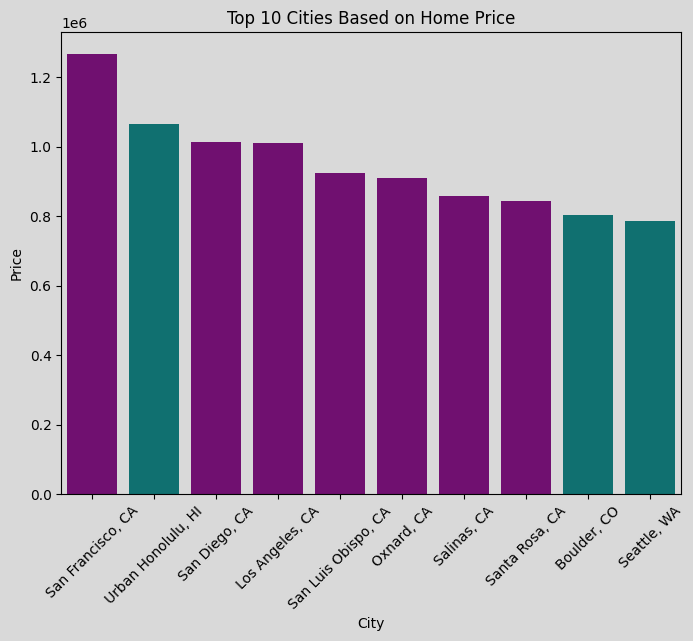

<Figure size 640x480 with 0 Axes>

In [111]:
# bar plot for cities with highest home prices
plt.figure(figsize=(8, 6))
colors = ['purple' if 'CA' in city else 'teal' for city in top_10_price["RegionName"]]
sns.barplot(x = top_10_price["RegionName"], y = top_10_price["2024-07-31"], palette=colors)
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Price")
plt.title("Top 10 Cities Based on Home Price")

# Change the background color
plt.gca().set_facecolor('#D9D9D9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#D9D9D9')  # Set the background color of the fig

# Save the figure
plt.savefig("../IMAGES/top_10_price.png")

plt.show()
plt.tight_layout()

In [112]:
# lowest prices
filtered_home_df.sort_values(by = '2024-07-31', ascending = True).head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,housingPercentChange,discrepancy
426,394780,332,"Lawton, OK",msa,OK,105871.955177,105088.704804,104342.779851,103767.513099,103434.585739,...,135468.066604,135582.098511,135955.799040,136791.359177,137829.177511,138633.280810,138763.620837,138428.180819,30.750566,-21.814231
67,394372,140,"Beaumont, TX",msa,TX,118841.453680,119139.357566,119551.989689,120266.809167,121181.157287,...,164580.804536,164218.431499,164468.709360,165791.950588,167482.876869,168573.358568,169086.653241,168696.634707,41.951002,-15.422494
711,395096,141,"Shreveport, LA",msa,LA,149798.306420,149403.156846,148963.478860,148844.331721,149500.517441,...,169226.730212,169271.599291,169692.704295,170655.257082,171656.016642,172239.309272,172712.117943,173048.339961,15.520892,-17.220950
196,394520,144,"Davenport, IA",msa,IL,128956.358539,128864.882237,128873.266054,129114.805418,129568.435084,...,177507.291387,177544.561086,178127.293096,179357.513014,180839.035028,181620.455125,181703.292986,181182.795427,40.499311,-2.462237
768,395160,93,"Toledo, OH",msa,OH,100925.411954,101476.092787,102101.150995,102711.348517,103256.275854,...,182816.261659,183095.435021,183694.898255,185077.804944,186833.830614,188372.877382,189337.100611,189695.523085,87.956154,20.094530
164,394488,158,"Columbus, GA",msa,GA,111854.303856,111472.139248,111366.182307,111429.496093,111749.951408,...,185038.374377,185451.869262,185909.289172,187047.865797,188431.858599,189513.558973,190263.313732,191038.960704,70.792678,5.293142
507,394870,127,"Mobile, AL",msa,AL,105602.433284,105643.369196,105636.081296,105806.867869,106248.758240,...,186334.093403,186688.489445,187432.155923,188777.054262,190468.226553,191923.784534,192572.567531,192745.161692,82.519622,6.588662
3,394299,251,"Abilene, TX",msa,TX,116800.595050,117081.811975,117607.011253,118188.855822,118650.044099,...,191104.713083,191168.646556,191895.586212,193224.785314,194664.910874,195355.061992,195459.366448,194900.821983,66.866292,9.557223
511,394875,143,"Montgomery, AL",msa,AL,130214.541523,130055.498769,130168.822752,130468.116011,130809.656981,...,192116.013476,192280.661066,192474.885895,193128.220051,193960.566706,194742.067479,195352.056247,195920.928630,50.460099,0.176638
657,395033,153,"Rockford, IL",msa,IL,91993.374829,91247.204265,90773.832707,90778.945676,91332.159862,...,185687.921487,186650.954154,187877.546714,189909.234944,192523.345311,194956.939155,196695.916575,198098.547967,115.340016,30.710164


In [113]:
# highest rent prices
top_10_rental = rental_df.sort_values(by = '2024-07-31', ascending = False).head(10)

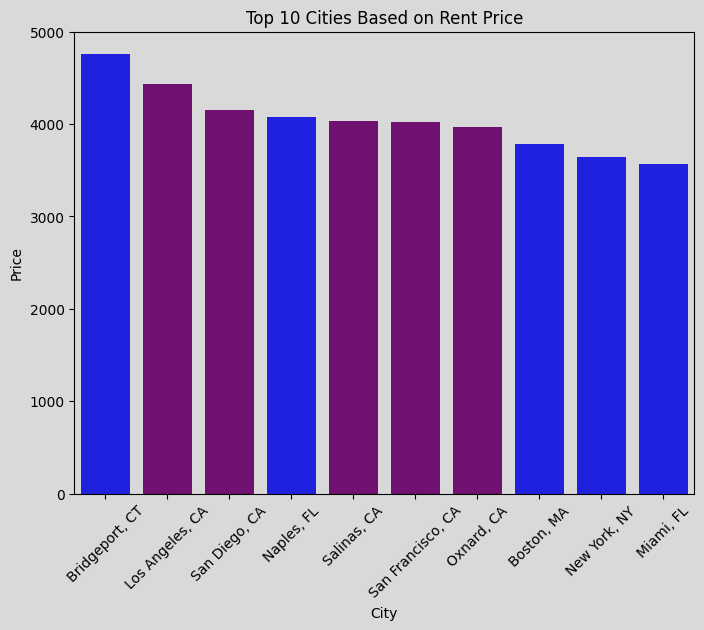

<Figure size 640x480 with 0 Axes>

In [114]:
# bar plot for cities with highest rental prices
plt.figure(figsize=(8, 6))
new_colors = ['purple' if 'CA' in city else 'blue' for city in top_10_rental["RegionName"]]
sns.barplot(x = top_10_rental["RegionName"], y = top_10_rental["2024-07-31"], palette=new_colors)
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Price")
plt.title("Top 10 Cities Based on Rent Price")

# Change the background color
plt.gca().set_facecolor('#D9D9D9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#D9D9D9')  # Set the background color of the fig

# Save the figure
plt.savefig("../IMAGES/top_10_price.png")

plt.show()
plt.tight_layout()

In [115]:
# lowest rent prices
rental_df.sort_values(by = '2024-07-31', ascending = True).head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,rentalPercentChange
157,395161,199,"Topeka, KS",msa,KS,677.075802,675.895481,684.429908,699.213968,705.395321,...,1074.768082,1070.950112,1068.150301,1066.458708,1073.866021,1081.653097,1099.532469,1111.859033,1119.388235,65.326871
84,394780,332,"Lawton, OK",msa,OK,769.564156,769.582512,776.699369,775.441953,778.264593,...,1112.843498,1105.489539,1116.669901,1145.529918,1150.152862,1145.690143,1150.457156,1171.407914,1174.083995,52.564797
156,395160,93,"Toledo, OH",msa,OH,731.710076,737.356289,736.556896,741.443672,743.611230,...,1155.899404,1160.877930,1178.837969,1173.030608,1184.713778,1197.208960,1217.016321,1226.640515,1228.260417,67.861624
165,395224,94,"Wichita, KS",msa,KS,830.828777,833.812938,834.697742,837.476562,841.383908,...,1189.114460,1188.897167,1191.043563,1202.146225,1211.276449,1220.356425,1225.152641,1230.152951,1236.681936,48.849194
148,395096,141,"Shreveport, LA",msa,LA,993.009274,997.518045,999.253978,999.718808,1004.458055,...,1281.360164,1267.889198,1259.913255,1267.311388,1281.882050,1305.643090,1307.240737,1311.616657,1318.138807,32.741843
56,394612,132,"Fort Wayne, IN",msa,IN,742.269732,740.211910,743.740091,751.279987,757.065917,...,1285.114815,1290.450626,1308.056004,1314.668571,1315.993876,1304.996124,1309.077132,1319.376766,1330.010670,79.181585
149,395107,159,"South Bend, IN",msa,IN,710.444784,707.765471,714.446986,725.565543,732.273923,...,1301.192513,1283.030455,1296.292146,1310.050523,1326.349701,1326.992264,1342.674213,1334.999592,1352.188889,90.329906
2,394304,83,"Akron, OH",msa,OH,799.963745,799.444330,794.695413,809.017360,810.941579,...,1291.077986,1299.707092,1313.416939,1324.198885,1312.175436,1318.633294,1322.399550,1344.870012,1358.396907,69.807309
40,394488,158,"Columbus, GA",msa,GA,829.034013,825.310562,828.018423,832.291687,839.112999,...,1323.219186,1324.171793,1327.588222,1358.333327,1387.017975,1396.424546,1375.129068,1370.282033,1372.047446,65.499536
101,394875,143,"Montgomery, AL",msa,AL,924.763291,931.042124,927.841012,925.307832,919.068811,...,1328.745046,1329.234688,1352.084550,1367.002704,1388.662393,1384.855669,1399.259599,1390.810693,1389.766280,50.283461


In [116]:
filtered_home_df.loc[filtered_home_df['StateName'] == 'ID']

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,housingPercentChange,discrepancy
94,394399,79,"Boise City, ID",msa,ID,188100.539938,189135.134328,190390.595649,191745.633655,193299.016553,...,474495.721872,474357.79582,474994.305646,476982.52681,479541.32114,481489.273811,482131.792088,482528.351884,156.52683,47.392825


In [117]:
state_migration_totals = state_migration.sort_values(by = 'total', ascending = False)
state_migration_totals

,Unnamed: 0,State,StateName,Out (18-19),In (18-19),Out (19-20),In (19-20),Out (20-21),In (20-21),Out (21-22),In (21-22),total
10,12.0,FL,Florida,-431307.0,558096.0,-459543.0,627077.0,-449260.0,708535.0,-456796.0,701126.0,797928.0
44,48.0,TX,Texas,-398960.0,513154.0,-433030.0,568588.0,-428878.0,608629.0,-434094.0,615997.0,611406.0
34,37.0,NC,North Carolina,-221982.0,270416.0,-235552.0,304066.0,-234389.0,312948.0,-229810.0,312680.0,278377.0
3,4.0,AZ,Arizona,-152769.0,218736.0,-167494.0,247311.0,-183111.0,239925.0,-186286.0,223000.0,239312.0
41,45.0,SC,South Carolina,-111270.0,152713.0,-120931.0,174757.0,-121683.0,186811.0,-118231.0,188335.0,230501.0
43,47.0,TN,Tennessee,-141689.0,175692.0,-156092.0,201161.0,-154055.0,217455.0,-155644.0,216084.0,202912.0
11,13.0,GA,Georgia,-218625.0,254258.0,-237908.0,275400.0,-228240.0,283732.0,-229313.0,280516.0,179820.0
13,16.0,ID,Idaho,-44773.0,67627.0,-50484.0,86822.0,-54156.0,86663.0,-55563.0,75661.0,111797.0
29,32.0,NV,Nevada,-90639.0,121694.0,-102378.0,130482.0,-108657.0,127596.0,-106894.0,121505.0,92709.0
1,1.0,AL,Alabama,-84579.0,93331.0,-89017.0,106352.0,-86001.0,107903.0,-84538.0,106884.0,70335.0


In [118]:
top_change_states = pd.DataFrame(filtered_home_df.groupby("StateName")["housingPercentChange"].mean())
top_change_states.sort_values(by = "housingPercentChange", ascending = False)
top_change_states.to_csv('../SOURCE/top_change_states.csv', index = True)

In [119]:
top_change_states.sort_values(by = "housingPercentChange", ascending = False).head()

,housingPercentChange
StateName,
ID,156.526830
UT,126.135662
FL,123.814271
WA,123.111635
NV,118.170320


In [120]:
top_rental_change_states = pd.DataFrame(rental_df.groupby("StateName")["rentalPercentChange"].mean())
top_rental_change_states.sort_values(by = "rentalPercentChange", ascending = False)
top_rental_change_states.to_csv('../SOURCE/top_rental_change_states.csv', index = True)

In [121]:
top_rental_change_states.sort_values(by = "rentalPercentChange", ascending = False).head()

,rentalPercentChange
StateName,
ID,109.134005
NJ,99.623032
FL,97.833749
WA,95.325961
AZ,95.133345
